In [166]:
import numpy as np                   # Numerical computation library
import pandas as pa                  # Dataframe and Data manipulation Library
import matplotlib.pyplot as plt      # Basic plotting functionality Library
import seaborn as sn                 # Advanced Data visualization Library
import numpy.random as rn
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor # Import the Regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LogisticRegression
import matplotlib.colors as pltco # A package to help with coloring plots
#[x for x in dir(list) if not '__' in x]

### Import Data Frame assign the name fifa
* Print out the head() or first 5 rows

In [17]:
fifa = pa.read_csv('https://www.dropbox.com/s/ov362sryogd0942/CompleteDataset.csv?dl=1', low_memory=False)

fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Acceleration,Aggression,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Position
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,89,63,...,83,94,23,91,92,31,80,85,88,ST LW
1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,92,48,...,88,85,26,87,73,28,59,90,85,RW
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,94,56,...,81,80,33,90,78,24,53,80,83,LW
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,€510K,88,78,...,83,87,38,77,89,45,80,84,88,ST
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,€230K,58,29,...,55,25,11,61,44,10,83,70,11,GK


### Fixing Bad Data
* Stripped "€" and "K" from Wage
* Stripped "+" and "-" from the front of the columns
* Removed any part of the String after "+" and "-" and convert columns to float

In [18]:
fifa['Wage'] = fifa['Wage'].map(lambda x: x.lstrip('€').rstrip('K'))

In [19]:
A = fifa["Age"] = fifa.Age.astype(float)
B = fifa["Overall"] = fifa.Overall.astype(float)
C = fifa["Wage"] = fifa.Wage.astype(float)
D = fifa["Potential"] = fifa.Potential.astype(float)

In [20]:
def removeStrings (X):
    if '+' in X:
        K = X.find('+')
        return X[:K]
    if '-' in X:
        K = X.find('-')
        return X[:K]
    else:  
        return X

In [21]:
def convertFloat(fifa, feature):
    for K in fifa.index: 
        fifa.loc[K,feature] = removeStrings(fifa.loc[K, feature])

    
    fifa.loc[:, feature] = fifa.loc[:,feature].astype("float")  
    return fifa

In [22]:
fifa = convertFloat(fifa, "Acceleration")
fifa = convertFloat(fifa, "Aggression")
fifa = convertFloat(fifa, "Agility")
fifa = convertFloat(fifa, "Balance")
fifa = convertFloat(fifa, "Ball control")

### Avalaible Columns
* Age, Overall, Potentail, Wage, Acceleration, Aggression, Agility, Balance, and Ball Control

Name                   object
Age                   float64
Nationality            object
Overall               float64
Potential             float64
Club                   object
Value                  object
Wage                  float64
Acceleration          float64
Aggression            float64
Agility               float64
Balance               float64
Ball control          float64
Composure              object
Crossing               object
Curve                  object
Dribbling              object
Finishing              object
Free kick accuracy     object
GK diving              object
GK handling            object
GK kicking             object
GK positioning         object
GK reflexes            object
Heading accuracy       object
Interceptions          object
Jumping                object
Long passing           object
Long shots             object
Marking                object
Penalties              object
Positioning            object
Reactions              object
Short pass

### K- nearest neighbors

In [68]:
X = np.array(fifa[['Ball control', 'Overall']])
y = np.array(fifa.iloc[:, 7])

In [69]:
for l in range(X.shape[1]):
    X[:, l] = ( X[:, l] - min(X[:, l]))/(max(X[:, l]) - min(X[:, l]))

In [70]:
 # Make the training and testing sets
n = X.shape[0]
test = int(0.30*n)            # We will use a test set made up of 30% of the data from our sample
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]       # Then create the test
y_test = y[:test]
X_train = X[test:]     # and train sets
y_train = y[test:]

In [71]:
from sklearn.neighbors import KNeighborsRegressor # Import the Regressor

In [72]:
# A bit of code for plotting the contour in a regression problem with two predictors
# Also prints out the training and testing errors

def plot_reg_model(reg, X_train, y_train, X_test, y_test):
    
    h = 0.01 # Mesh size  
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = -0.1, 1.1
    y_min, y_max = -0.1, 1.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h))
    Z = reg.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contour(xx, yy, Z)
    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='+');
    
    print('Training R2: {}'.format(reg.score(X_train, y_train)))
    print('Testing R2: {}'.format(reg.score(X_test, y_test)))

Training R2: 0.6715942728489941
Testing R2: 0.6144627879331559


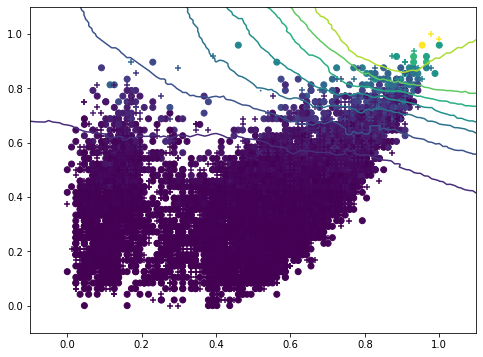

In [73]:
reg = KNeighborsRegressor(n_neighbors=100)
reg.fit(X_train, y_train)
plot_reg_model(reg, X_train, y_train, X_test, y_test)

In [74]:
X = np.array(fifa[['Ball control', 'Agility']])
y = np.array(fifa.iloc[:, 3])

In [75]:
for l in range(X.shape[1]):
    X[:, l] = ( X[:, l] - min(X[:, l]))/(max(X[:, l]) - min(X[:, l]))

In [76]:
 # Make the training and testing sets
n = X.shape[0]
test = int(0.30*n)            # We will use a test set made up of 30% of the data from our sample
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]       # Then create the test
y_test = y[:test]
X_train = X[test:]     # and train sets
y_train = y[test:]

Training R2: 0.5428764460317256
Testing R2: 0.511481697279566


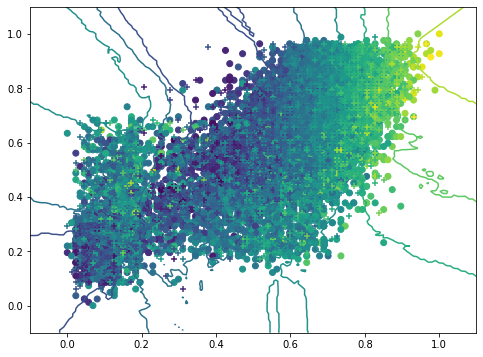

In [78]:
reg = KNeighborsRegressor(n_neighbors=25)
reg.fit(X_train, y_train)
plot_reg_model(reg, X_train, y_train, X_test, y_test)

### PCA Model
* PCA Model with colums 7,8,9 vs Age

In [167]:
# Build a matrix of the predictors and results
X = np.array(fifa.iloc[:,7:10])
y = np.array(fifa.iloc[:, 1])

# We shuffle the data using a random permutation
import numpy.random as rn
n = X.shape[0]
test = int(0.25*n)            # We will use a test set made up of 20% of the data from our sample
perm = rn.permutation(n)   
Xpca= Xpca[perm]
y = y[perm]
X_test = Xpca[:test]       # Then create the test
y_test = y[:test]
X_train = Xpca[test:]     # and train sets
y_train = y[test:]

pca = PCA(n_components=2) # Use PCA to identify the two most important components

# component here means a linear combination of the features

Xpca = pca.fit_transform(X);

In [168]:
cat1 = LogisticRegression(solver='liblinear', multi_class='auto').fit(X_train[:, 0:2], y_train)
cat1.score(X_train[:, 0:2], y_train), cat1.score(X_test[:, 0:2], y_test)

(0.08557022096989471, 0.08298109010011123)

In [169]:
def plot_reg_model(reg, X_train, y_train, X_test, y_test):

    h = 0.01 # Mesh size  
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = -40.0, 40.0
    y_min, y_max = -20.0, 20.0
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h))
    Z = reg.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contour(xx, yy, Z)
    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='+');
    
    print('Training R2: {}'.format(reg.score(X_train, y_train)))
    print('Testing R2: {}'.format(reg.score(X_test, y_test)))

In [ ]:
reg = LinearRegression()
reg.fit(X_train,y_train)
plot_reg_model(reg, X_train, y_train, X_test, y_test)

* PCA Model With Columns 10,11,12 vs Age

In [171]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import matplotlib.colors as pltco # A package to help with coloring plots
# Build a matrix of the predictors and results
X = np.array(fifa.iloc[:,10:13])                        
y = np.array(fifa.iloc[:, 1])

# We shuffle the data using a random permutation
import numpy.random as rn
n = X.shape[0]
test = int(0.25*n)            # We will use a test set made up of 20% of the data from our sample
perm = rn.permutation(n)   
Xpca= Xpca[perm]
y = y[perm]
X_test = Xpca[:test]       # Then create the test
y_test = y[:test]
X_train = Xpca[test:]     # and train sets
y_train = y[test:]

pca = PCA(n_components=2) # Use PCA to identify the two most important components

# component here means a linear combination of the features

Xpca = pca.fit_transform(X);

In [172]:
cat1 = LogisticRegression(solver='liblinear', multi_class='auto').fit(X_train[:, 0:2], y_train)
cat1.score(X_train[:, 0:2], y_train), cat1.score(X_test[:, 0:2], y_test)

(0.10077117010232835, 0.10767519466073415)

Training R2: 0.039588686010161744
Testing R2: 0.03673952661359836


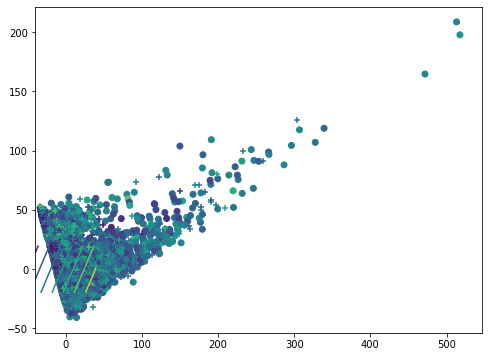

In [173]:
reg = LinearRegression()
reg.fit(X_train,y_train)
plot_reg_model(reg, X_train, y_train, X_test, y_test)

### Regression Models Liner, Ridge, and Lasso

In [195]:
X = np.array(fifa[['Age', 'Overall']])
y = np.array(fifa['Wage'])

In [196]:
# A bit of code for plotting the contour in a regression problem with two predictors
# Also prints out the training and testing errors
import numpy.random as rn
def plot_reg_model(reg, X, y):

    # We shuffle the data using a random permutation

    n = X.shape[0]
    test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
    perm = rn.permutation(n)   
    X = X[perm]
    y = y[perm]
    X_test = X[:test]       # Then create the test
    y_test = y[:test]
    X_train = X[test:]     # and train sets
    y_train = y[test:]
    
    reg.fit(X_train, y_train) # Fit the model
     
    nn = 200
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
    y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nn),   # Changed the function to use linspace rather than arrange
        np.linspace(y_min, y_max, nn))                    # This keeps us from having to adjust h.
    Z = reg.predict(np.c_[xx.ravel(), yy.ravel()]) # predict

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contour(xx, yy, Z)
    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='+');
    
    print('Training R2: {}'.format(reg.score(X_train, y_train)))
    print('Testing R2: {}'.format(reg.score(X_test, y_test)))
    
    return reg

Training R2: 0.3689103087912336
Testing R2: 0.3842425694880095


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

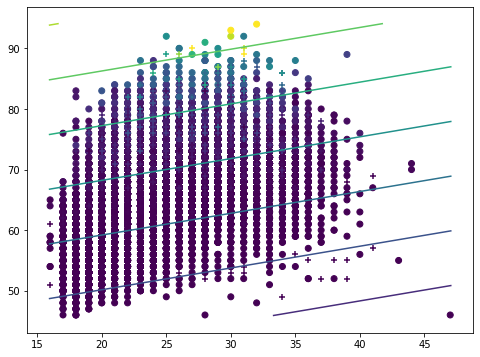

In [197]:
reg = LinearRegression()
plot_reg_model(reg, X, y)

In [198]:
from sklearn.linear_model import Ridge

Training R2: 0.37145293059917583
Testing R2: 0.37278329042625125


Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

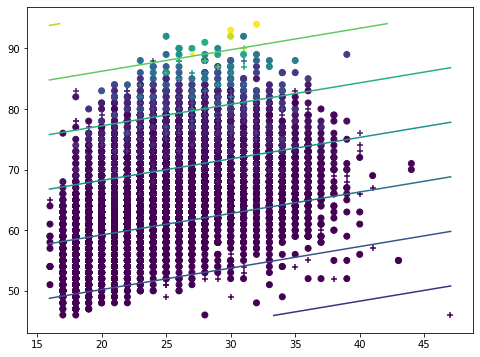

In [107]:
reg = Ridge(alpha=2)
plot_reg_model(reg, X, y)

In [108]:
from sklearn.linear_model import Lasso

Training R2: 0.37654899149631016
Testing R2: 0.35415156464356057


Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

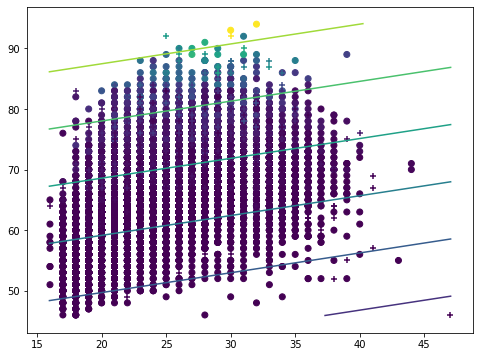

In [110]:
reg=Lasso(alpha=1)
plot_reg_model(reg, X, y)

In [111]:
from sklearn.neighbors import KNeighborsRegressor

Training R2: 0.7726896229638741
Testing R2: 0.7055434847733334


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

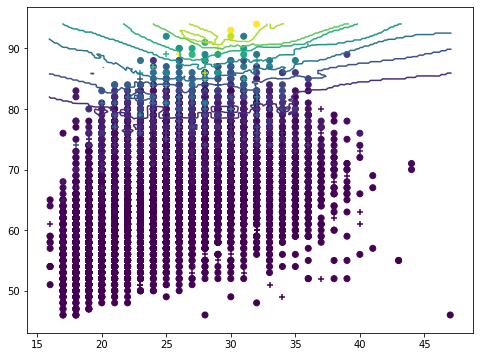

In [113]:
knn = KNeighborsRegressor(n_neighbors=10)
plot_reg_model(knn, X, y)

In [114]:
from sklearn.tree import DecisionTreeRegressor

Training R2: 0.7667372768440577
Testing R2: 0.7644186210762325


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

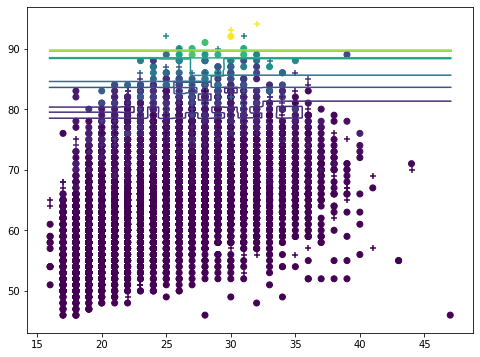

In [115]:
tree = DecisionTreeRegressor(min_samples_leaf=5)
plot_reg_model(tree, X, y)

### Nueral Networks

In [174]:
X = np.array(fifa[['Agility', 'Overall']])
y = np.array(fifa['Wage'])

In [175]:
# A bit of code for plotting the contour in a regression problem with two predictors
# Also prints out the training and testing errors

def plot_reg_model(reg, X, y):

    # We shuffle the data using a random permutation

    n = X.shape[0]
    test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
    perm = rn.permutation(n)   
    X = X[perm]
    y = y[perm]
    X_test = X[:test]       # Then create the test
    y_test = y[:test]
    X_train = X[test:]     # and train sets
    y_train = y[test:]
    
    reg.fit(X_train, y_train) # Fit the model
     
    nn = 200
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
    y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nn),   # Changed the function to use linspace rather than arrange
        np.linspace(y_min, y_max, nn))                    # This keeps us from having to adjust h.
    Z = reg.predict(np.c_[xx.ravel(), yy.ravel()]) # predict

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contour(xx, yy, Z)
    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='+');
    
    print('Training R2: {}'.format(reg.score(X_train, y_train)))
    print('Testing R2: {}'.format(reg.score(X_test, y_test)))
    
    return reg

### Nueral Network Ridge Regression

Training R2: 0.35067164215888624
Testing R2: 0.3598170336951837


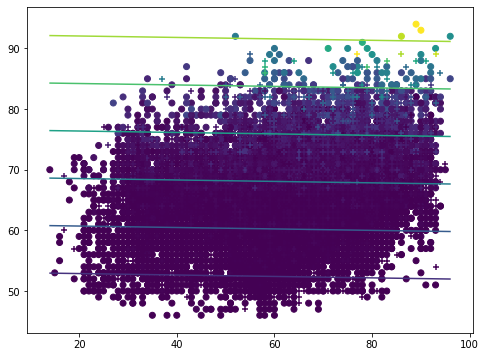

In [176]:
reg = Ridge(alpha=2)
plot_reg_model(reg, X, y);
plt.savefig('15.2.png')

### Nueral Network Lasso Regression

Training R2: 0.35261819129680405
Testing R2: 0.354014081484223


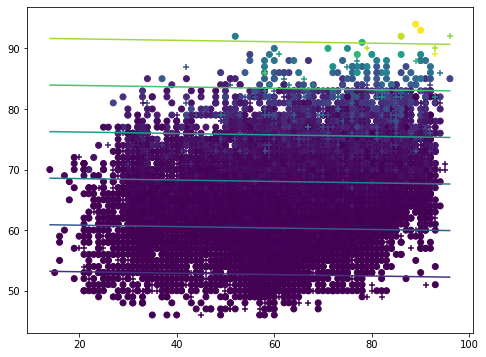

In [177]:
reg=Lasso(alpha=1)
plot_reg_model(reg, X, y);
plt.savefig('15.3.png')

### Nueral Network K-nearest Neighbors Regression

Training R2: 0.7617529764235231
Testing R2: 0.7620556630207628


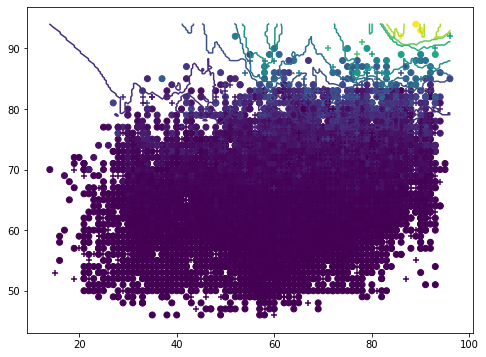

In [178]:
knn = KNeighborsRegressor(n_neighbors=6)
plot_reg_model(knn, X, y);
plt.savefig('15.4.png')

### Nueral Network Decision Tree Regression

Training R2: 0.8147072240377065
Testing R2: 0.7162957324440291


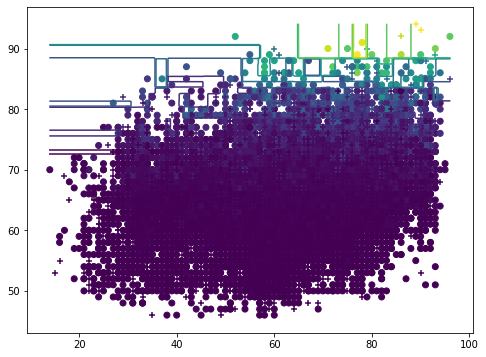

In [179]:
tree = DecisionTreeRegressor(max_depth=10)
plot_reg_model(tree, X, y);

### Ensemble Methods

Training R2: 0.7541338741768628
Testing R2: 0.7272976598084419


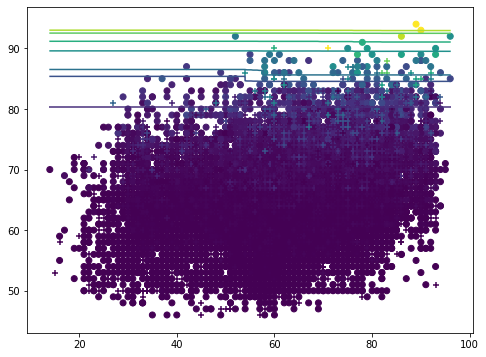

In [180]:
forest = RandomForestRegressor(n_estimators=100, max_depth=3, n_jobs=-1)
plot_reg_model(forest, X, y);
plt.savefig('15.6.png')

### Gradient Boosting Esamble Network Model

Training R2: 0.8122074397189312
Testing R2: 0.7481864715772859


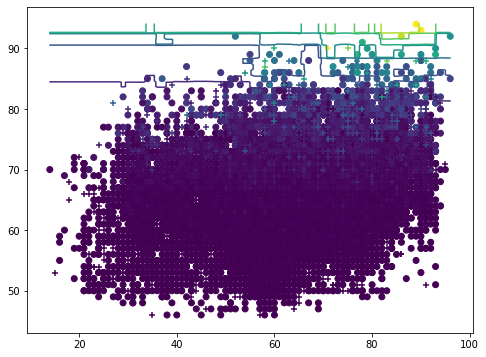

In [181]:
boost = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, max_depth=5)
plot_reg_model(boost, X, y);
plt.savefig('15.7.png')

### Nueral Networks for Regression

In [184]:
X = np.array(fifa[['Age', 'Overall']])
y = np.array(fifa['Wage'])

In [185]:
v = [0]*X.shape[1]
for k in range(X.shape[1]):
    M = X[:, k].max()
    m = X[:, k].min()
    v[k] = (X[:, k] - m)/(M - m)
Xn = np.c_[v].transpose()   # Note I could not assign these to X because the type was int not float

Training R2: 0.7655544245499659
Testing R2: 0.7079936656741341


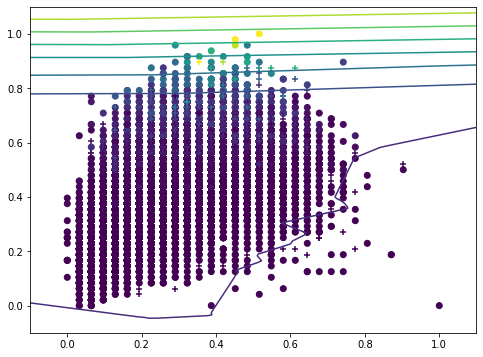

In [186]:
mlp = MLPRegressor(hidden_layer_sizes = (100), solver = 'lbfgs', activation = 'relu', alpha=0.0001)
plot_reg_model(mlp, Xn, y);
plt.savefig('15.8.png')

* adding an addtional layer to improve performance

Training R2: 0.7661934182479206
Testing R2: 0.7056887385688867


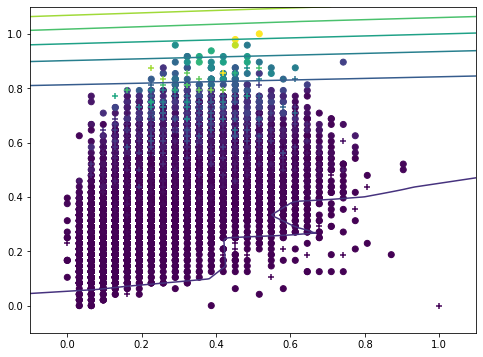

In [187]:
mlp = MLPRegressor(hidden_layer_sizes = (100, 100), solver = 'lbfgs', activation = 'relu', alpha=0.0001)
plot_reg_model(mlp, Xn, y);
plt.savefig('15.9.png')